In [ ]:
# !pip install pyshbundle==0.0.3.1

In [ ]:
# !pip uninstall pyshbundle -y

In [1]:
# import pyshbundle
import pandas as pd
import os
import xarray as xr

In [2]:
os.chdir('D:\open_source\pyshbundle')
import pyshbundle

In [3]:
import matplotlib.pyplot as plt

In [4]:
os.getcwd()

'D:\\open_source\\pyshbundle'

In [3]:
help(pyshbundle)

Help on package pyshbundle:

NAME
    pyshbundle - Top-level package for pyshbundle.

PACKAGE CONTENTS
    GRACE_Data_Driven_Correction_Vishwakarma
    GRACEconstants
    GRACEpy
    Phase_calc
    basin_avg
    clm2cs
    clm2sc
    cs2sc
    eigengrav
    gaussian
    grule
    gsha
    gshs
    iplm
    ispec
    klm2sc
    load_longterm_mean
    naninterp
    neumann
    normalklm
    plm
    plr
    pyshbundle
    read_GRACE_SH_paths
    reader_replacer
    reader_replacer_csr
    reader_replacer_itsg
    reader_replacer_jpl
    sc2cs
    statistical_downscaling_grids_TWS
    tws_cal

DATA
    __email__ = 'aminshk50@gmail.com'

VERSION
    0.0.1

AUTHOR
    Amin Shakya

FILE
    /home/abhishek/anaconda3/envs/pyshbundle/lib/python3.11/site-packages/pyshbundle/__init__.py




In [5]:
import pyshbundle.reader_replacer_jpl
import pyshbundle.read_GRACE_SH_paths
import pyshbundle.clm2sc
import pyshbundle.klm2sc
import pyshbundle.tws_cal
import pyshbundle.basin_avg

In [6]:
help(pyshbundle.read_GRACE_SH_paths)

Help on module pyshbundle.read_GRACE_SH_paths in pyshbundle:

NAME
    pyshbundle.read_GRACE_SH_paths

DESCRIPTION
    The purpose of this script is to,
    firstly read what the data source is (JPL, CSR or ITSG)
    read file path for GRACE L2 spherical harmonics inputs,
    read replacement files for tn13 and tn14
    source of the SH files (JPL, ITSG or CSR)

FUNCTIONS
    read_GRACE_SH_paths(use_sample_files=0)
        Returns path of data files, path of tn13 and path of tn14 replacement files
        
        Args:
            use_sample_files (int, optional): _description_. Defaults to 0.
        
        Raises:
            Exception: _description_
        
        Returns:
            _type_: _description_

FILE
    d:\open_source\pyshbundle\pyshbundle\read_grace_sh_paths.py




#   MASTER
## Welcome to mat2py tool. This applies SH to process GRACE SH coefficients into Terrestrial water storage changes
#### Kindly provide the paths to respective files and outputs
#### 1. Reading SH coeffs from NASA JPL and replacing degree 1,2,3 coeffs'

In [7]:
import numpy as np
import pkg_resources

/mnt/Data/5hk/Data/Vivek/JPL_input<br>
/mnt/Data/5hk/Data/Vivek/JPL_TN_files/TN-13_GEOC_JPL_RL06.txt<br>
/mnt/Data/5hk/Data/Vivek/JPL_TN_files/TN-14_C30_C20_GSFC_SLR.txt

In [8]:
path_sh = 'D:\open_source\pyshbundle\sample_input_data\JPL_input'
path_tn13_jpl = 'D:\open_source\pyshbundle\pyshbundle\data\JPL_TN_files\TN-13_GEOC_JPL_RL06.txt'
path_tn14_jpl = 'D:\open_source\pyshbundle\pyshbundle\data\JPL_TN_files\TN-14_C30_C20_GSFC_SLR.txt'
source = 'jpl'

file_name = "GSM-2_2002094-2002120_GRAC_JPLEM_BB01_0600.gz"
file_path = path_sh + '\\' + file_name


In [10]:
sh_clm, dates_start, dates_end, no_of_files = pyshbundle.reader_replacer_jpl.reader_replacer_jpl(path_sh, path_tn14_jpl, path_tn13_jpl)

JPL
Reading into clm format complete!
Number of files read: 201
Starting replacement
found: 37
2002-04-04 2002-04-04 0
2002-05-02 2002-05-02 1
2002-08-01 2002-08-01 2
2002-09-01 2002-09-01 3
2002-10-01 2002-10-01 4
2002-11-01 2002-11-01 5
2002-12-01 2002-12-01 6
2003-01-01 2003-01-01 7
2003-02-01 2003-02-01 8
2003-03-01 2003-03-01 9
2003-04-01 2003-04-01 10
2003-05-01 2003-05-01 11
2003-07-01 2003-07-01 12
2003-08-01 2003-08-01 13
2003-09-01 2003-09-01 14
2003-10-01 2003-10-01 15
2003-11-01 2003-11-01 16
2003-12-01 2003-12-01 17
2004-01-01 2004-01-01 18
2004-02-04 2004-02-04 19
2004-03-01 2004-03-01 20
2004-04-01 2004-04-01 21
2004-05-01 2004-05-01 22
2004-06-01 2004-06-01 23
2004-11-01 2004-11-01 28
2004-12-01 2004-12-01 29
2005-01-01 2005-01-01 30
2005-02-01 2005-02-01 31
2005-03-01 2005-03-01 32
2005-04-01 2005-04-01 33
2005-05-01 2005-05-01 34
2005-06-01 2005-06-01 35
2005-07-01 2005-07-01 36
2005-08-01 2005-08-01 37
2005-09-01 2005-09-01 38
2005-10-01 2005-10-01 39
2005-11-01 2005

In [13]:
len(sh_clm[0][0])

33271

In [14]:
sh_clm[0][0][0:6]

[0.0, 1, 1, 2, 2, 2]

* `sh_clm` is a ndarray containg lists of data: degree;  order; clm; slm; delta clm; delta slm; start data; end date*

#### 2. The following cells perform a bunch of operations

* Storing SH coeffs in clm format into SC format
* Calculation of delta clm & delta slm
* Application of Gaussian filter/filter of user choice
* Application of filter to delta clm, slm to get filtered SH coeffs
* Calling gshs() with filtered SH coeffs to obtain TWS fields
* Flipping the TWS fields to get 0 degree longitude in the middle
* Saving data in netCDF4 format and writing to disk

In [11]:
if source == 'jpl':
    raw_sc = pyshbundle.clm2sc.clm2sc(sh_clm);
elif source == 'csr':
    raw_sc = pyshbundle.klm2sc.klm2sc(sh_clm);
elif source== 'itsg':
    raw_sc = pyshbundle.clm2scclm2sc(sh_clm);

Conversion into clm format complete


In [12]:
lmax = 96
gs = 3
half_rad_gf = 500

In [13]:
print('Kindly enter the following parameters based on your application')
lmax = int(input("Enter lmax: "))
gs = float(input("Enter grid size: "))
half_rad_gf = int(input("Enter half radius of Gaussian filter: "))
print("lmax , grid size & half raduius of gaussian filter are : ", lmax ,", " , gs,", ",half_rad_gf)

Kindly enter the following parameters based on your application
lmax , grid size & half raduius of gaussian filter are :  96 ,  3.0 ,  500


In [14]:
lon = np.arange(-180,180,gs)
lat = np.arange(89,-91,-gs)
# dates = pd.to_datetime(pd.Series(dates_start), format='%Y-%m-%d').dt.strftime('%d-%m-%Y') \
#         + "    " \
#         +pd.to_datetime(pd.Series(dates_end), format='%Y-%m-%d').dt.strftime('%d-%m-%Y')
dates = pd.to_datetime(pd.Series(dates_start), format='%Y-%m-%d')#.dt.strftime('%d-%m-%Y')
print('dates read! \n')

dates read! 



##### Remove long term mean to get anomalies
* Long term mean is calculated from NASA JPL SH coeffs in the period 01-01-2005 & 31-12-2010 (6 years continuous)

/media/abhishek/DATA/open_source/pyshbundle/pyshbundle/data/long_mean/SH_long_mean_jpl.npy

In [15]:
long_mean = "D:\open_source\pyshbundle\pyshbundle\data\long_mean\SH_long_mean_jpl.npy"
if source== 'jpl':
    SH_long_mean_jpl = np.load(long_mean)    # load the long term mean SH coeffs---> JPL 
    delta_sc = raw_sc - SH_long_mean_jpl
elif source== 'csr':
    SH_long_mean_csr = np.load(long_mean)    # load the long term mean SH coeffs---> CSR
    delta_sc = raw_sc - SH_long_mean_csr
elif source== 'itsg':
    SH_long_mean_itsg = np.load(long_mean)    # load the long term mean SH coeffs---> ITSG
    delta_sc = raw_sc - SH_long_mean_itsg

In [16]:
long_mean_jpl = 'D:\open_source\pyshbundle\pyshbundle\data\long_mean\SH_long_mean_jpl.npy'
SH_long_mean_jpl = np.load(long_mean_jpl)

In [20]:
raw_sc.shape

(201, 97, 193)

In [18]:
no_of_files

201

In [19]:
tws_fields = pyshbundle.tws_cal.tws_cal(delta_sc,lmax,gs,half_rad_gf,no_of_files)
tws_fields = np.float32(tws_fields)

  0%|          | 0/201 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (97,) (97,193) 

In [20]:
lons = np.arange(-180, 180, gs)
lats = np.arange(-90, 90, gs)
x, y = np.meshgrid(lons, lats)

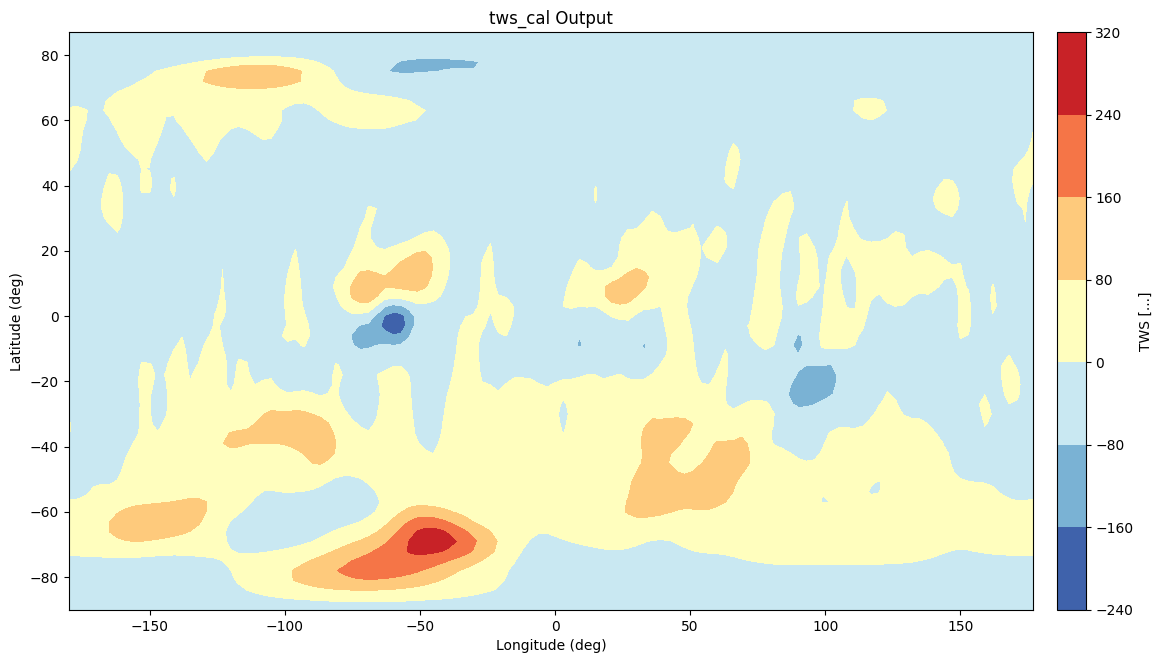

In [45]:
# Plotting and Visualization

fig = plt.figure(figsize=(15, 7.5))

# plot the data
max_level = 320
min_level = -240
step_level = 25

im = plt.contourf(x, y, tws_fields[27, :, :], cmap='RdYlBu_r', levels = np.arange(min_level, max_level + step_level, step_level))
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")

plt.colorbar(shrink=1.0, orientation='vertical', pad=0.02,label=f"TWS [...]")

plt.title(f"tws_cal Output")

plt.show()

In [16]:
ds = xr.Dataset(
    data_vars=dict(
        tws=(["time","lat", "lon"], tws_fields)
    ),
    coords = {
        "time":(('time'),dates),
        "lat":lat,
        "lon":lon },
    attrs=dict(description="TWS Anomaly corresponding to long term (2004-2010) mean \n lmax=96 and half radius of Gaussian filter = 500Km"),
)
ds

<xarray.Dataset>
Dimensions:  (time: 201, lat: 60, lon: 120)
Coordinates:
  * time     (time) datetime64[ns] 2002-04-04 2002-05-02 ... 2022-06-01
  * lat      (lat) int64 89 86 83 80 77 74 71 68 ... -70 -73 -76 -79 -82 -85 -88
  * lon      (lon) int64 -180 -177 -174 -171 -168 -165 ... 165 168 171 174 177
Data variables:
    tws      (time, lat, lon) float32 -7.8 -7.432 -7.034 ... 132.9 134.9 137.0
Attributes:
    description:  TWS Anomaly corresponding to long term (2004-2010) mean \n ...

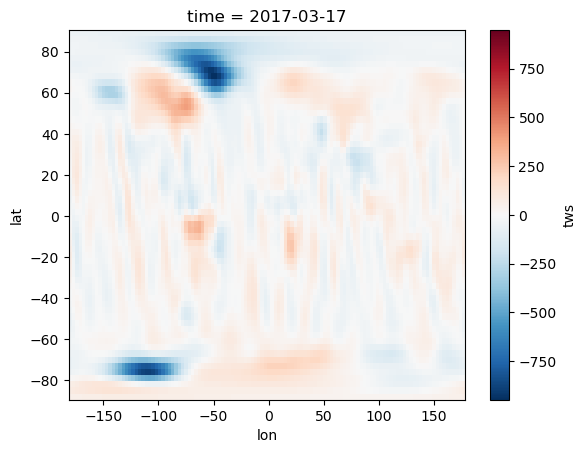

In [17]:
ds.tws.isel(time=150).plot()

In [22]:
ds.time.isel(time=114)

<xarray.DataArray 'time' ()>
array('2012-12-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2012-12-01

In [18]:
ds.to_netcdf('./output'+source+'_tws.nc', engine="netcdf4")

## Basin average

## Basin average
Krishna basin - /media/abhishek/DATA/krishna_basefile/krishna_basin.shp 

Ganga basin - /media/abhishek/DATA/krishna_basefile/ganga_basin.shp

Amazon basin - 
wgs84/media/abhishek/DATA/krishna_basefile/amazon_basin.shp

Area of basin in km2: 6242413.139554368


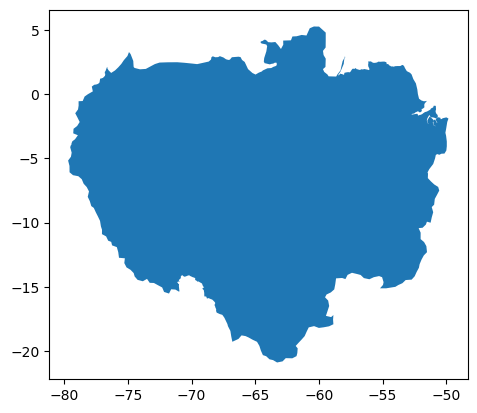

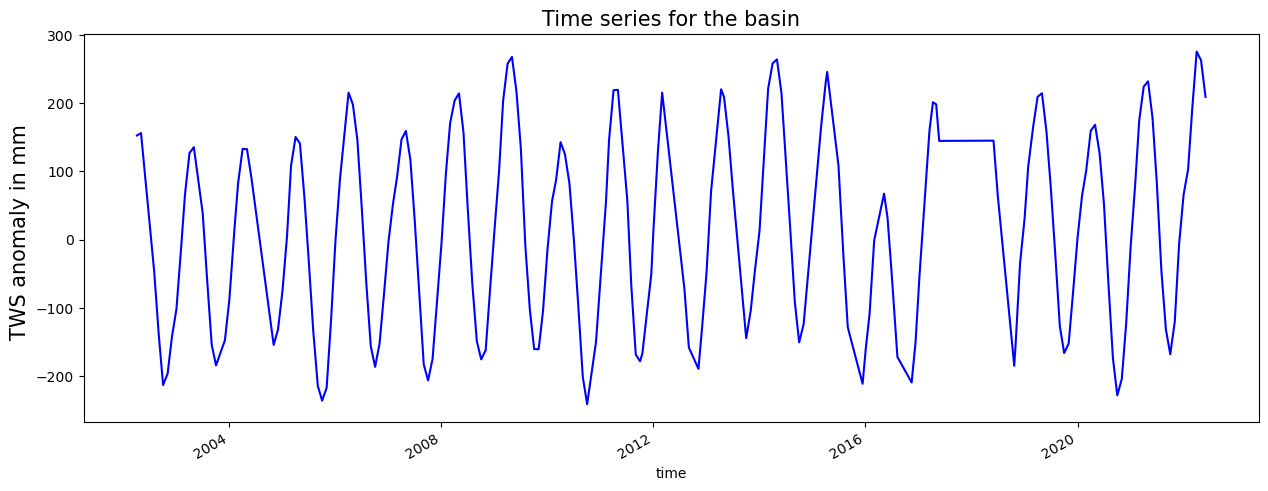

In [53]:
ans = 'y'
if ans == 'y':
    path_shapefile = '/media/abhishek/DATA/krishna_basefile/amazon_basin.shp'
    c_rs = 'EPSG:29191'
    amazon_tws = pyshbundle.basin_avg.basin_avg(ds,path_shapefile, c_rs, no_of_files, gs)
else:
    pass

In [19]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import salem

def basin_avg_trial(data, path: str, c_rs, m, gs):
    """Computes the TWSA time-series for a given basin shape file, using the SH data.

    Args:
        data (xarray.Dataset): xarray dataset with format - {coordinates: [time, lat, lon], Data variables: [tws]}
        path (str): valid path to the basin shape file with extension (.shp)
        c_rs (crs): the crs into which the dataframe must be transformed (related to salem module)
        m (int): number of files read
        gs (_type_): grid size [units to do]

    Returns:
        _type_: _description_
    """
    shdf = salem.read_shapefile(path)
    shdf.crs
    shdf.plot()
    shdf_area = sum(shdf.to_crs(c_rs).area)
    print('Area of basin in km2:',shdf_area/1e6)
    if shdf_area < 63*1e9:
        print('Warning basin too small for GRACE data application')
    
    tws_val = data.tws.values
    dates = data.time
    lat,lon = data.lat, data.lon
    lat_shape, lon_shape = data.tws.shape[1],data.tws.shape[2]
    
    # Calculation of area of each corresponding to  the latitudes and longitudes
    # not sure if ';' is proper syntax may be the octave residu

    deg = gs
    x = np.linspace(0, 359+(1-deg), int(360/deg), dtype='double')
    y = np.linspace(0, 179+(1-deg), int(180/deg), dtype='double')
    x1 = np.linspace(1*deg, 360, int(360/deg), dtype='double')
    y1 = np.linspace(1*deg, 180, int(180/deg), dtype='double')
    lambd,theta = np.meshgrid(x,y)  
    lambd1,theta1 = np.meshgrid(x1,y1)  

    a = np.sin(np.deg2rad(90-theta)) - np.sin(np.deg2rad(90-theta1))
    b = (lambd1 - lambd)*np.pi/180
    
    
    # Area of each grid (360*720)
    area = (6378.137**2)*pow(10, 6)*(np.multiply(a, b))        # units m^2
    tot_area = np.sum(np.sum(area))
    tws_m = np.zeros([m, lat_shape, lon_shape])
    for i in range(0,m,1):
        tws_m[i, :, :] = np.multiply(tws_val[i, :, :],area)
    ds_area_w = xr.Dataset(
    data_vars=dict(
        tws=(["time","lat", "lon"], tws_m)
    ),
    coords = {
        "time":dates,
        "lat":lat,
        "lon":lon },
    attrs=dict(description="TWS Anomaly corresponding to long term (2004-2010) mean \n lmax=96 and half radius of Gaussian filter = 500Km"),
    )
    
    ds_area_w_clp = ds_area_w.salem.roi(shape=shdf)
    # Time series for the whole basin(shapefile) in user defined range
    
    alpha = ds_area_w_clp.tws.sum(dim=('lon','lat'))/shdf_area
    """
    fig,ax = plt.subplots(figsize=(15,5))
    alpha.plot(ax=ax, color='b')
    ax.set_box_aspect(0.33)
    ax.set_title('Time series for the basin', size=15)
    ax.set_ylabel('TWS anomaly in mm ', size=15)
    plt.tight_layout()
    """
    
    return alpha


In [20]:
import os
#os.chdir(path_functions)
from pyshbundle import gaussian
from pyshbundle import gshs
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def tws_cal_trial(data, lmax: int, gs: float, r, m):
    """_summary_

    Args:
        data (np.ndarray): SC coefficients
        lmax (int): maximum degree
        gs (float): grid size
        r (_type_): _description_
        m (_type_): _description_
    """
    SC = data
    
    gfilter = gaussian.gaussian(lmax,r)
    grid_y = int(180/gs)
    grid_x = int(360/gs)
    tws_f = np.zeros([m,grid_y,grid_x], dtype ='longdouble')
    for i in tqdm(range(0,m,1)):
        field = SC[i,0:lmax+1,96-lmax:96+lmax+1]
        shfil = np.zeros([lmax+1,2*lmax+1])
        for j in range(0,2*lmax+1,1):
            shfil[:,j] = gfilter[:,0] * field[:,j]
        quant = 'water' 
        grd = 'cell'
        n = int(180/gs) 
        h = 0 
        jflag = 0
        
        
        ff = gshs.gshs(shfil, quant, grd, n, h, jflag)[0]
        
        ff = ff*1000
        tws_f[i,:,0:int(grid_x/2)] = ff[:,int(grid_x/2):]
        tws_f[i,:,int(grid_x/2):] = ff[:,0:int(grid_x/2)]   
    
    plt.imshow(tws_f[0,:,:])
    return(tws_f)


### Using salem to read shape file

In [27]:
amazon_basin_shp = '/media/abhishek/DATA/krishna_basefile/amazon_basin.shp'

In [30]:
help(salem)

Help on package salem:

NAME
    salem - Salem package

PACKAGE CONTENTS
    datasets
    descartes
    gis
    graphics
    sio
    tests (package)
    utils
    version
    wrftools

FUNCTIONS
    lazy_property(fn)
        Decorator that makes a property lazy-evaluated.

DATA
    API_KEY = None
    cache_dir = '/home/abhishek/.salem_cache'
    download_dir = '/home/abhishek/.salem_cache/downloads'
    has_gdal = True
    python_version = 'py3'
    sample_data_dir = '/home/abhishek/.salem_cache/salem-sample-data-57e6d...
    sample_data_gh_commit = '57e6d694aa470b967336f5ca2d4fc743c5c8efd6'
    string_types = (<class 'str'>,)
    wgs84 = <Other Coordinate Operation Transformer: longlat...sed coordin...

VERSION
    0.0.0

FILE
    /home/abhishek/anaconda3/envs/geoenv/lib/python3.11/site-packages/salem/__init__.py




In [39]:
import geopandas as gpd

In [40]:
amazon_shpdf = gpd.read_file(amazon_basin_shp)

In [45]:
amazon_utm = amazon_shpdf.to_crs('EPSG:29191')

In [46]:
amazon_utm.area

0    6.242413e+12
dtype: float64

In [28]:
shdf = salem.read_shapefile(amazon_basin_shp)


/tmp/ipykernel_140264/4195626983.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shdf.to_crs(shdf.crs).area


0    495.99988
dtype: float64

In [ ]:
shdf.crs
shdf.plot()
shdf_area = sum(shdf.to_crs(c_rs).area)
print('Area of basin in km2:',shdf_area/1e6)
if shdf_area < 63*1e9:
    print('Warning basin too small for GRACE data application')